Is there any relation between the demographic info and the diagnosis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Get the metadata and one of the smaller datasets for testing

In [21]:
# get metadata and training set
meta = pd.read_csv(r'datasets\HAM10000_metadata.csv')

# reclassify as cancer (1) or not cancer (0)
meta['binary_class'] = meta['dx'].apply(lambda x: 'Melanoma' if x=='mel' else 'Non-melanoma')

In [22]:
meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,binary_class
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Non-melanoma
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Non-melanoma
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Non-melanoma
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Non-melanoma
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Non-melanoma


### Uni-variet analysis

What the different data type and what do they look like?

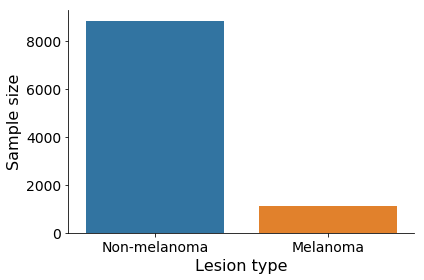

In [23]:
xlabels = ['Melanoma', 'Non-melanoma']
ylabels = range(0, 9000, 2000)

fig, ax = plt.subplots()
dx = meta.groupby(['binary_class']).agg('count')['age'].sort_values(ascending=False)
ax.set_yticks(ylabels)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_xticklabels(xlabels, fontsize=14)
sns.barplot(x=dx.index, y=dx.values)
ax.set_xlabel('Lesion type', fontsize=16)
ax.set_ylabel('Sample size', fontsize=16)
sns.despine()
plt.tight_layout()
plt.savefig('sample_sizes.jpg')

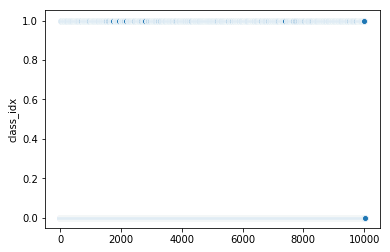

In [26]:
# what order is the dataset in?
meta = meta.sample(len(meta))
meta = meta.reset_index(drop=True)
meta['class_idx'] = meta['dx'].apply(lambda x: 1 if x=='mel' else 0)
sns.scatterplot(x=meta.index.values, y=meta['class_idx'])